In [331]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [332]:
heart_dataset = pd.read_csv('/content/heart failur classification dataset.csv')
heart_dataset.head(3)

,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0,75.0,0,582,0,20,1,265000.00,1.9,NaN,Male,No,4.0,1
1,1,55.0,0,7861,0,38,0,263358.03,1.1,136.0,Male,No,6.0,1
2,2,65.0,0,146,0,20,0,162000.00,1.3,129.0,Male,Yes,7.0,1


In [333]:
heart_dataset.shape

(299, 14)

In [334]:
heart_dataset.isnull().sum()

Unnamed: 0                  0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                6
sex                         0
smoking                     0
time                        7
DEATH_EVENT                 0
dtype: int64

In [335]:
heart_dataset = heart_dataset.drop(['time'], axis = 1)
heart_dataset = heart_dataset.drop(['serum_sodium'], axis = 1)
heart_dataset.shape

(299, 12)

In [336]:
heart_dataset.isnull().sum()

Unnamed: 0                  0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
sex                         0
smoking                     0
DEATH_EVENT                 0
dtype: int64

In [337]:
heart_dataset['sex']=heart_dataset['sex'].map({'Male':0,'Female':1})
heart_dataset['smoking']=heart_dataset['smoking'].map({'No':0,'Yes':1})

In [338]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.1)


In [339]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
x = heart_dataset.iloc[:, :-1]
y = heart_dataset.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [340]:
print("Training set: x->{} , y->{} \n Testing set: x->{} , y->{}".format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

Training set: x->(239, 11) , y->(239,) 
 Testing set: x->(60, 11) , y->(60,)


Support Vector Machine (SVM)

In [341]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [342]:
print("Training accuracy of the model is {:.2f}".format(svc.score(x_train, y_train)))
print("Testing accuracy of the model is {:.2f}".format(svc.score(x_test, y_test)))

Training accuracy of the model is 0.80
Testing accuracy of the model is 0.77


In [343]:
predictions = svc.predict(x_test)
print(predictions)
scoreSVC = accuracy_score(y_test, predictions)

[0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0]


In [344]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, y_test)
print(mat)

[[36 13]
 [ 1 10]]


Neural Network (MLPClassifier)

In [345]:
from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(8), activation="relu", max_iter=100000)

In [346]:
nnc.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=8, max_iter=100000)

In [347]:
print("The Training accuracy of the model is {:.2f}".format(nnc.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(nnc.score(x_test, y_test)))

The Training accuracy of the model is 0.31
The Testing accuracy of the model is 0.38


In [348]:
predictions = nnc.predict(x_test)
print(predictions)
scoreMLP = accuracy_score(y_test, predictions)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [349]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, y_test)
print(mat)

[[ 0  0]
 [37 23]]


Random Forest

In [350]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train, y_train)
print("The Training accuracy of the model is {:.2f}".format(rfc.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(rfc.score(x_test, y_test)))


The Training accuracy of the model is 1.00
The Testing accuracy of the model is 0.83


In [351]:
predictions = rfc.predict(x_test)
scoreRFC = accuracy_score(y_test, predictions)

In [352]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, y_test)
print(mat)

[[35  8]
 [ 2 15]]


PCA

In [353]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=6)

In [354]:
principal_components= pca.fit_transform(heart_dataset)
print(principal_components)

[[ 1.64196942e+03 -1.04666213e-01 -1.49508304e+02  8.02067750e+00
  -1.77989297e+01  9.80238089e-02]
 [ 1.76651064e+00  7.27929460e+03 -1.41242690e+02 -2.07483858e+00
   5.48883704e+00 -3.64854690e-01]
 [-1.01358133e+05 -4.11096717e+02 -1.46802424e+02  1.40852130e+01
  -8.61304264e+00 -4.12904293e-01]
 ...
 [ 4.78642317e+05  1.36185448e+03  1.45285696e+02 -9.92075299e+00
   1.59714261e+01  5.10694405e-02]
 [-1.23357580e+05  1.86097860e+03  1.50988126e+02  5.18236275e+00
   8.60447934e+00  3.75751273e-01]
 [ 1.31641874e+05 -4.17920478e+02  1.47975438e+02 -2.01495566e-01
   7.27612941e+00  6.11795606e-01]]


In [355]:
sum(pca.explained_variance_ratio_)

0.9999999998694665

In [356]:
principal_df= pd.DataFrame(data=principal_components, columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6"])
principal_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,1641.969425,-0.104666,-149.508304,8.020678,-17.798930,0.098024
1,1.766511,7279.294598,-141.242690,-2.074839,5.488837,-0.364855
2,-101358.133280,-411.096717,-146.802424,14.085213,-8.613043,-0.412904
3,-53358.143091,-457.733144,-145.721888,23.254837,2.890004,0.416654
4,63641.865259,-437.146346,-146.038041,14.613252,-10.333549,1.072098


In [357]:
main_df=pd.concat([principal_df,heart_dataset["DEATH_EVENT"]], axis=1)

In [358]:
main_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,DEATH_EVENT
0,1641.969425,-0.104666,-149.508304,8.020678,-17.798930,0.098024,1
1,1.766511,7279.294598,-141.242690,-2.074839,5.488837,-0.364855,1
2,-101358.133280,-411.096717,-146.802424,14.085213,-8.613043,-0.412904,1
3,-53358.143091,-457.733144,-145.721888,23.254837,2.890004,0.416654,1
4,63641.865259,-437.146346,-146.038041,14.613252,-10.333549,1.072098,1


In [359]:
x2 = main_df.drop("DEATH_EVENT" , axis=1)
y2 = main_df["DEATH_EVENT"]

In [360]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2 , y2 , test_size=0.2, random_state=0)

In [361]:
#SVM 
svc.fit(x2_train, y2_train)

SVC(kernel='linear')

In [362]:
print("Training accuracy of the model is {:.2f}".format(svc.score(x2_train, y2_train)))
print("Testing accuracy of the model is {:.2f}".format(svc.score(x2_test, y2_test)))

Training accuracy of the model is 0.83
Testing accuracy of the model is 0.78


In [363]:
predictions = svc.predict(x2_test)
scoreSVC2 = accuracy_score(y2_test, predictions)

In [364]:
#RandomForest
rfc.fit(x2_train, y2_train)

RandomForestClassifier(n_estimators=50)

In [365]:
print("The Training accuracy of the model is {:.2f}".format(rfc.score(x2_train, y2_train)))
print("The Testing accuracy of the model is {:.2f}".format(rfc.score(x2_test, y2_test)))

The Training accuracy of the model is 1.00
The Testing accuracy of the model is 0.83


In [366]:
predictions = rfc.predict(x2_test)
scoreRFC2 = accuracy_score(y2_test, predictions)

In [367]:
#MLPClassifier
nnc.fit(x2_train, y2_train)

MLPClassifier(hidden_layer_sizes=8, max_iter=100000)

In [368]:
print("The Training accuracy of the model is {:.2f}".format(nnc.score(x2_train, y2_train)))
print("The Testing accuracy of the model is {:.2f}".format(nnc.score(x2_test, y2_test)))

The Training accuracy of the model is 0.56
The Testing accuracy of the model is 0.45


In [369]:
predictions = nnc.predict(x2_test)
scoreMLP2 = accuracy_score(y_test, predictions)

Comparing Accuracy

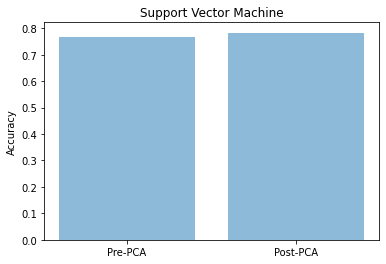

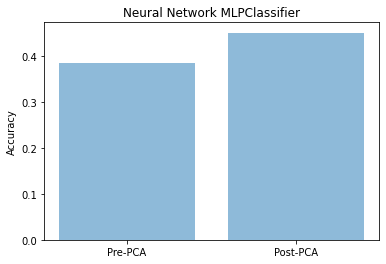

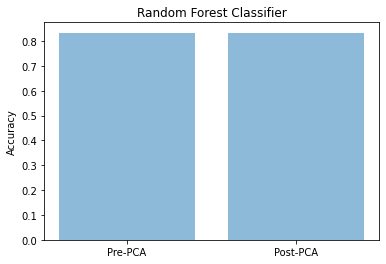

In [370]:
plt.bar(['Pre-PCA','Post-PCA'],[scoreSVC, scoreSVC2],align='center',alpha=0.5)
plt.title('Support Vector Machine')
plt.ylabel("Accuracy")
plt.show()

plt.bar(['Pre-PCA','Post-PCA'],[scoreMLP, scoreMLP2],align='center',alpha=0.5)
plt.title('Neural Network MLPClassifier')
plt.ylabel("Accuracy")
plt.show()

plt.bar(['Pre-PCA','Post-PCA'],[scoreRFC, scoreRFC2],align='center',alpha=0.5)
plt.title('Random Forest Classifier')
plt.ylabel("Accuracy")
plt.show()